# Example 10.5: The Infinite Square Well Using the Fake Diffusion Method

(a) Use the fake time diffusion method on a lattice with 21 points to find the lowest eigenvalue and the corresponding eigenstate, of the infinite square well. 

Start with a trial eigenfunction $\phi(x) = x(1-x)$ and perform *100* time evolutions with a time step $\Delta \tau = 0.00075$. 

$V(x) = 0$ for $0 \leq x \leq 1$, $V(x)= \infty$ otherwise, with $\phi(0) = \phi(1) = 0$. 

You may set $\hbar = 2m = 1$ and solve the problem: 

$\left[ -\frac{ \mathrm{d}^2 } { \mathrm{d} x^2 } + V(x) \right] \phi = \epsilon \phi$.

(b) Plot the lowest eigenfunction and compare to the exact one. 

(c) Plot the evolution of the eigenvalue for each time step and show that it converges to the correct lowest one.

(d) Use the explicit method to find the *largest eigenvalue*. Use a time step of $\Delta \tau = 0.0015$. Compare to your expectation from the largest eigenvalue for the discrete case with $N=21$.


Recall that the exact eigenfunctions and eigenvalues are given by:

$\psi_\lambda = \sqrt{2}^{1/2} \sin \lambda \pi x$ with $\epsilon_\lambda = \lambda^2 \pi^2$, where $\lambda$ is a non-zero integer. 

Also recall that in the discretized form, $\epsilon_\lambda = \frac{4}{h^2} \sin^2 \frac{ \lambda \pi } { 2N }$.

Solution:

(a) We can use any of the methods we previously discussed to find the lowest eigenvalue. 

We will use the explicit evolution for the lowest eigenvalue, but we have to be careful not to use a too large time step. 

Let's copy over the code from Example 10.2. We will need to:

- create the initial eigenfunction 
- modify the operator $\hat{H}$, the $S$ function is now $V(x) \phi(x)$. 
- and also include a normalization of the function at the end of each time step.

Furthermore, we will implement the discretized form of the energy

In [168]:
import numpy as np

# define the V potential:
def Vfunc(x):
    """The potential for the 1D TISE"""
    return 0.

# Define the initial function:
def phiInitialfunc(x):
    """The initial function"""
    return x*(1-x)

# define the exact solution
def phiGroundState(x):
    """The exact un-normalized ground-state solution"""
    return np.sin( np.pi * x)

# define the function that evolves a given x on a lattice using the naive discretization
# phiInitial is the initial form of the function, i.e. phi(x,0)
# tmax is the maximum time 
# V is the potential 
# Deltat is the time increment
# N is the number of lattice intervals (i.e. N+1 lattice points) 
def EvolveNaive(phiInitial, V, Deltat, nt, N):
    """Evolves an initial function according to the differential equation defined by S"""
    # calculate the spacing between lattice points
    h = 1/N
    # discretize the initial function on the lattice:  
    x = np.linspace(0,1,N+1)
    phii = phiInitial(x)
    phii = np.sqrt(N)*phii/np.linalg.norm(phii)
    # list of numpy arrays to hold the time-stepped lattices
    phi = [phii] # start with the initial condition
    # array of energies:
    Evals = []
    Evals.append(Energy(phi[0], V, N))
    # loop over time:
    for ti in range(nt):
        phi.append(np.zeros(N+1)) # add the next time step
        # loop over space:
        for i in range(1,N):
            x = i*h
            # update: 
            phi[ti+1][i] = (phi[ti][i] + Deltat/h**2 * (phi[ti][i+1] + phi[ti][i-1] - 2 * phi[ti][i])) - V(x)* phi[ti][i] * Deltat
        # normalize:
        phi[ti+1] = np.sqrt(N)*phi[ti+1]/np.linalg.norm(phi[ti+1])
        Evals.append(Energy(phi[ti+1], V, N))
    return phi, Evals

# define the energy function for our problem: 
def Energy(phit, V, N):
    """Calculates the energy for the 1D TISE"""
    # calculate the spacing between lattice points
    h = 1/N
    # the return value
    Eres = 0
    for i in range(1,N+1):
        Eres = Eres + ((phit[i] - phit[i-1])**2) / h + h*V(i*h) * phit[i]**2
    return Eres

In [169]:
# Run: 
Deltat = 0.00075
nt = 100
N = 20 # intervals

phiSol, Energies = EvolveNaive(phiInitialfunc, Vfunc, Deltat, nt, N)
# get the final energy: 
lowestEigenvalue  = Energies[-1]
print('Lowest eigenvalue after evolution=', lowestEigenvalue)

# get the ground state (exact):
x = np.linspace(0,1,N+1)
phiGS = phiGroundState(x)
# normalize
phiGS = np.sqrt(N)*phiGS/np.linalg.norm(phiGS)
EnergyGS = Energy(phiGS, Vfunc, N)
print('Real exact discretized ground state energy=',EnergyGS)

Lowest eigenvalue after evolution= 9.849328147703362
Real exact discretized ground state energy= 9.849327523889817


(b) Let's now plot the eigenfunction corresponding to the lowest-energy state. 

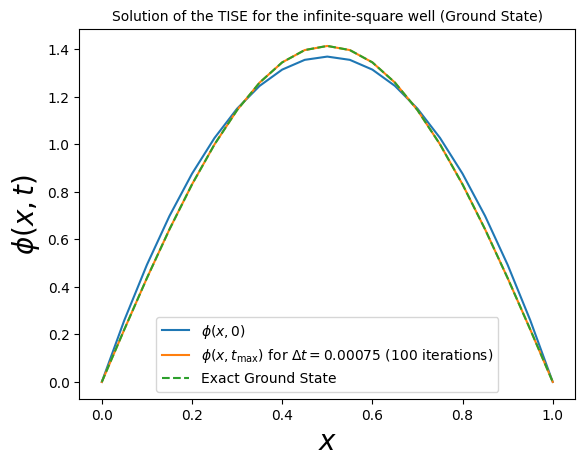

In [171]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\phi(x,t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Solution of the TISE for the infinite-square well (Ground State)', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
x = np.linspace(0,1,N+1)
ax.plot(x, phiSol[0], label=r'$\phi(x,0)$') 
ax.plot(x, phiSol[-1], label=r'$\phi(x,t_\mathrm{max})$ for $\Delta t=0.00075$ (100 iterations)', ls='-') 
# plot the ground-state
phiGS = phiGroundState(x)
# normalize
phiGS = np.sqrt(N) * phiGS/np.linalg.norm(phiGS)
ax.plot(x, phiGS, label=r'Exact Ground State', ls='--') 



# construct the legend:
ax.legend(loc='lower center')  # Add a legend

plt.show() # show the plot here

(c) The evolution of the energy with iterations: 

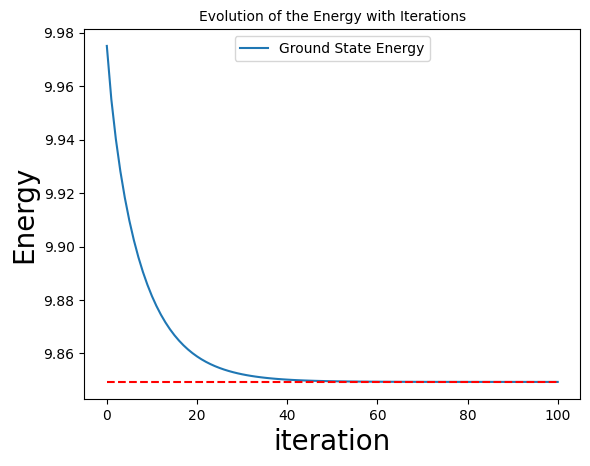

In [172]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'iteration', fontsize=20) # set the x label
ax.set_ylabel(r'Energy', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Evolution of the Energy with Iterations', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
x = range(nt+1)
ax.plot(x, Energies, label=r'Ground State Energy') 

# plot the exact energy as a horizontal line: 
ax.hlines(xmin=x[0], xmax=x[-1], y=EnergyGS, ls='--', color='red')

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

(d) Let's now choose a large time step to get the largest eigenvalue!

In [173]:
# Run: 
Deltat = 0.0015
nt = 100
N = 20 # intervals

phiSol, Energies = EvolveNaive(phiInitialfunc, Vfunc, Deltat, nt, N)
# get the final energy: 
highestEigenvalue  = Energies[-1]
print('Largest eigenvalue after evolution=', highestEigenvalue)

Largest eigenvalue after evolution= 1590.1506523895573


For $N=20$, we expect the largest eigenvalue to be $\lambda = N-1$:

$\epsilon_\lambda = 4 N^2 \sin^2 \frac{ (N-1) \pi } { 2N }$,

which corresponds to: 

$\epsilon_\lambda = 4 \times 20^2 \sin^2 \frac{ 19 \pi } { 40 } = 1600 \sin^2 \frac{ 19 \pi } { 40 } = 1590.15$, 

which is very close to the eigenvalue that we have found!